In [1]:
import sqlalchemy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Here is the algorithm

# Procedures for the below work

1. Create the file for Train and Test Data from the data given
2. Insert Sales list using for loop for each record according to the conditons
     if stock = demand ....sales = damand
     if stock > demand ....sales = demand
     if demand > stock ....sales = stock

3. Calculate profit using for loop according to
         profit = sales - stock....we assume remaining stock went bad
         
4. Using scipy model ...get the model y = ax + c for our data of profit and demand

5. Draw a regression plot for the data
6. Using linear_model to test again our regression if it matches
7. prepare data for demand to be used to predict profit
8.  Predict the profit values and apppend them to the data
9. Join the train and test data sets while fully complted
9. Create a sqlite table and dump the data

In [3]:
dir(sqlalchemy)

['ARRAY',
 'BIGINT',
 'BINARY',
 'BLANK_SCHEMA',
 'BLOB',
 'BOOLEAN',
 'BigInteger',
 'Binary',
 'Boolean',
 'CHAR',
 'CLOB',
 'CheckConstraint',
 'Column',
 'ColumnDefault',
 'Constraint',
 'DATE',
 'DATETIME',
 'DDL',
 'DECIMAL',
 'Date',
 'DateTime',
 'DefaultClause',
 'Enum',
 'FLOAT',
 'FetchedValue',
 'Float',
 'ForeignKey',
 'ForeignKeyConstraint',
 'INT',
 'INTEGER',
 'Index',
 'Integer',
 'Interval',
 'JSON',
 'LargeBinary',
 'MetaData',
 'NCHAR',
 'NUMERIC',
 'NVARCHAR',
 'Numeric',
 'PassiveDefault',
 'PickleType',
 'PrimaryKeyConstraint',
 'REAL',
 'SMALLINT',
 'Sequence',
 'SmallInteger',
 'String',
 'TEXT',
 'TIME',
 'TIMESTAMP',
 'Table',
 'Text',
 'ThreadLocalMetaData',
 'Time',
 'TypeDecorator',
 'Unicode',
 'UnicodeText',
 'UniqueConstraint',
 'VARBINARY',
 'VARCHAR',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__go',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_util',
 'alias',
 'all_',
 'and_',
 

In [4]:
#create a dictionary with our train data

train = {"period_in_weeks":[1 ,2,3,4, 5, 6,7] , "Demand":[i*750 for i in [1500 , 2000 ,3500 ,5000 , 6000 , 6550 , 8000]]\
        , "Stocks":[i*600 for i in [1500 , 2500 , 3000 , 4500 , 6500 , 7000 , 7550]]}
train

{'period_in_weeks': [1, 2, 3, 4, 5, 6, 7],
 'Demand': [1125000, 1500000, 2625000, 3750000, 4500000, 4912500, 6000000],
 'Stocks': [900000, 1500000, 1800000, 2700000, 3900000, 4200000, 4530000]}

In [5]:
#convert dictionary to a dataframe
train = pd.DataFrame(train)
#check the size of records
size = train.shape[0]
train
        

,period_in_weeks,Demand,Stocks
0,1,1125000,900000
1,2,1500000,1500000
2,3,2625000,1800000
3,4,3750000,2700000
4,5,4500000,3900000
5,6,4912500,4200000
6,7,6000000,4530000


In [6]:
#convert the stocks and demand data into list
#we assume the demanded unit is according to the current market price of 750
#and stock is amount at 650 per unit
Demand =list(train["Demand"])
Stocks =list(train["Stocks"])
#create a sales list
Sales = []
#function to update sales
def addSales(data):
    for i in range(data.shape[0]):
        if Stocks[i]/600 == Demand[i]/750:
            Sales.append(Stocks[i])
        elif Stocks[i]/600 < Demand[i]/750:
            Sales.append(Stocks[i])
        elif Stocks[i]/600 > Demand[i]/750:
            Sales.append(Demand[i])
#             print("yess")
addSales(train)
#create a column Sales and add the items in sales list
train["Sales"] = Sales
train

,period_in_weeks,Demand,Stocks,Sales
0,1,1125000,900000,900000
1,2,1500000,1500000,1500000
2,3,2625000,1800000,1800000
3,4,3750000,2700000,2700000
4,5,4500000,3900000,4500000
5,6,4912500,4200000,4912500
6,7,6000000,4530000,4530000


In [28]:
#calculating profit
# profit = (sales -stocks)
#we assume that leftover goes bad
#profit list
Profit = []
#function to get profits
def getProfit(data):
    for i in range(data.shape[0]):
        profit =(Sales[i]) - (Stocks[i])
        Profit.append(profit)
    
getProfit(train)
#create the column Profit and populate it with data
train["Profit"] = Profit
# train["Stocks"] = list((train["Stocks"]))
train

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,period_in_weeks,Demand,Stocks,Sales,Profit
0,1,1125000,900000.0,900000.0,0
1,2,1500000,1500000.0,1500000.0,0
2,3,2625000,1800000.0,1800000.0,0
3,4,3750000,2700000.0,2700000.0,0
4,5,4500000,3900000.0,4500000.0,600000
5,6,4912500,4200000.0,4912500.0,712500
6,7,6000000,4530000.0,4530000.0,0


In [8]:
test = {"period_in_weeks":[8,9,10,11] , "Demand":[i*750 for i in[8750 , 9000 , 9500 , 10000]]}

In [9]:
test = pd.DataFrame(test)
test

,period_in_weeks,Demand
0,8,6562500
1,9,6750000
2,10,7125000
3,11,7500000


In [10]:
# lets join the two tables
df = pd.concat([train ,test] , axis = 0 , sort = False)
df

,period_in_weeks,Demand,Stocks,Sales,Profit
0,1,1125000,900000.0,900000.0,0.0
1,2,1500000,1500000.0,1500000.0,0.0
2,3,2625000,1800000.0,1800000.0,0.0
3,4,3750000,2700000.0,2700000.0,0.0
4,5,4500000,3900000.0,4500000.0,600000.0
5,6,4912500,4200000.0,4912500.0,712500.0
6,7,6000000,4530000.0,4530000.0,0.0
0,8,6562500,NaN,NaN,NaN
1,9,6750000,NaN,NaN,NaN
2,10,7125000,NaN,NaN,NaN


In [11]:
#checking the correlation bettween thedata posted
df.corr()
#from here we are able to see that 
#the data has all high correration that is positive except for profit which 
#shows verry little relationship with the rest


,period_in_weeks,Demand,Stocks,Sales,Profit
period_in_weeks,1.000000,0.982877,0.984082,0.951668,0.485404
Demand,0.982877,1.000000,0.979855,0.943747,0.463609
Stocks,0.984082,0.979855,1.000000,0.987824,0.600019
Sales,0.951668,0.943747,0.987824,1.000000,0.717171
Profit,0.485404,0.463609,0.600019,0.717171,1.000000


In [12]:
#checking data description
df.describe()

,period_in_weeks,Demand,Stocks,Sales,Profit
count,11.000000,1.100000e+01,7.000000e+00,7.000000e+00,7.00000
mean,6.000000,4.759091e+06,2.790000e+06,2.977500e+06,187500.00000
std,3.316625,2.266220e+06,1.441770e+06,1.655043e+06,321859.82974
min,1.000000,1.125000e+06,9.000000e+05,9.000000e+05,0.00000
25%,3.500000,3.187500e+06,1.650000e+06,1.650000e+06,0.00000
50%,6.000000,4.912500e+06,2.700000e+06,2.700000e+06,0.00000
75%,8.500000,6.656250e+06,4.050000e+06,4.515000e+06,300000.00000
max,11.000000,7.500000e+06,4.530000e+06,4.912500e+06,712500.00000


In [13]:
train = df[:size]
test = df[size:]

y = 2.6108597285067874x + 2997963.800904977


 Error is : 2.2315171343621047


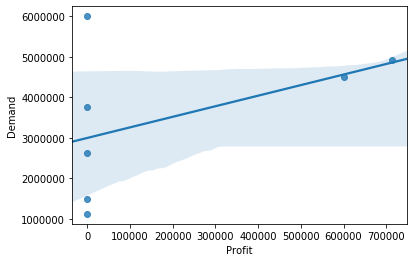

In [14]:
from scipy import stats
#lets plot regression plot
# here a means coefficient of dependent variable
# b means intercept
# c means  r 
# d means p values
# e means standard error

a , b, c , d  , e = stats.linregress(train["Profit"] , train["Demand"])
print("y = {}x + {}".format(a , b))
print("\n\n Error is : {}".format(e))
sns.regplot(x=train["Profit"] , y=train["Demand"] , data = df)
plt.show()

In [15]:
#start making linear models 
from sklearn.linear_model import LinearRegression
#prepare the datas to be used fro training
X_train = train["Profit"].values[: , np.newaxis]
Y_train = train["Demand"].values

In [16]:
#create an instance for the model
lm  = LinearRegression()
#fit your data and train the model
lm.fit(X_train , Y_train)
print("Our model is {}x + {}".format(lm.coef_ , lm.intercept_))

Our model is [2.61085973]x + 2997963.800904977


In [17]:
#prepare testing data
Y_test = test["Demand"].values[: , np.newaxis]
#predict the profit data
prediction = lm.predict(Y_test)

In [18]:
print(prediction)

[20131730.76923078 20621266.9683258  21600339.36651585 22579411.76470589]


In [19]:
test["Profit"] = prediction
test

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,period_in_weeks,Demand,Stocks,Sales,Profit
0,8,6562500,NaN,NaN,2.013173e+07
1,9,6750000,NaN,NaN,2.062127e+07
2,10,7125000,NaN,NaN,2.160034e+07
3,11,7500000,NaN,NaN,2.257941e+07


In [20]:
#lets make assumption that assume that they sales were same as Demand
#since demand is directly related to sales
test["Sales"] = test["Demand"]

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# sales + profit = stock
test["Stocks"] = test["Sales"] + test["Profit"]
test

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,period_in_weeks,Demand,Stocks,Sales,Profit
0,8,6562500,2.669423e+07,6562500,2.013173e+07
1,9,6750000,2.737127e+07,6750000,2.062127e+07
2,10,7125000,2.872534e+07,7125000,2.160034e+07
3,11,7500000,3.007941e+07,7500000,2.257941e+07


In [27]:
#join the two tables
data = pd.concat([train ,test] , axis = 0 , sort = False )
data

,period_in_weeks,Demand,Stocks,Sales,Profit
0,1,1125000,9.000000e+05,900000.0,0.000000e+00
1,2,1500000,1.500000e+06,1500000.0,0.000000e+00
2,3,2625000,1.800000e+06,1800000.0,0.000000e+00
3,4,3750000,2.700000e+06,2700000.0,0.000000e+00
4,5,4500000,3.900000e+06,4500000.0,6.000000e+05
5,6,4912500,4.200000e+06,4912500.0,7.125000e+05
6,7,6000000,4.530000e+06,4530000.0,0.000000e+00
0,8,6562500,2.669423e+07,6562500.0,2.013173e+07
1,9,6750000,2.737127e+07,6750000.0,2.062127e+07
2,10,7125000,2.872534e+07,7125000.0,2.160034e+07


In [23]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
data.to_sql("HIQ_Table" , engine)

In [24]:
#check database content
read = pd.read_sql_query('SELECT * FROM HIQ_Table' , engine)
print(read)

    index  period_in_weeks   Demand        Stocks      Sales        Profit
0       0                1  1125000  9.000000e+05   900000.0  0.000000e+00
1       1                2  1500000  1.500000e+06  1500000.0  0.000000e+00
2       2                3  2625000  1.800000e+06  1800000.0  0.000000e+00
3       3                4  3750000  2.700000e+06  2700000.0  0.000000e+00
4       4                5  4500000  3.900000e+06  4500000.0  6.000000e+05
5       5                6  4912500  4.200000e+06  4912500.0  7.125000e+05
6       6                7  6000000  4.530000e+06  4530000.0  0.000000e+00
7       0                8  6562500  2.669423e+07  6562500.0  2.013173e+07
8       1                9  6750000  2.737127e+07  6750000.0  2.062127e+07
9       2               10  7125000  2.872534e+07  7125000.0  2.160034e+07
10      3               11  7500000  3.007941e+07  7500000.0  2.257941e+07
